<a href="https://colab.research.google.com/github/Bhevendra/Deep-Learning---ANN-1/blob/main/ANN_MNIST_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN with Image Data

- Artificial Neural Networks (ANN) are a popular architecture in deep learning and are modeled after the biological neurons in the human brain.

- ANNs are composed of interconnected artificial neurons and the overall behavior of the network is determined by the connections and weights between neurons.


- One popular type of ANN is the feedforward neural network which is organized into layers with input, output and hidden layers.


- Training an ANN is done by adjusting the weights of the connections between neurons using labeled data and the most common method is backpropagation.


- ANNs are implemented using various libraries such as TensorFlow, Keras and PyTorch, providing a high-level interface for building and training neural networks.

## Practical Implementation

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

In [2]:
# Loading the MNIST dataset
mnist = tf.keras.datasets.mnist

In [5]:
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

In [8]:
# Printing the shape of the loaded data
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

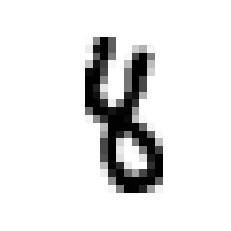

In [14]:
# Displaying an image from the dataset
plt.imshow(X_train_full[7000],cmap='binary')
plt.axis("off")
plt.show()

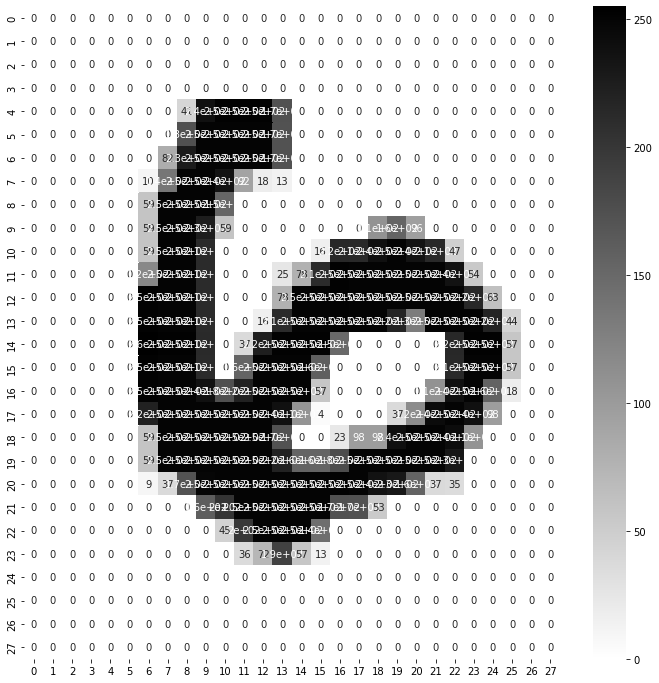

In [17]:
# Displaying a heatmap of an image from the dataset
plt.figure(figsize=(12,12))
sns.heatmap(X_train_full[9000],annot=True,cmap="binary")

In [18]:
# Scale the data between 0 to 1 by divideing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

In [19]:
# scale the test set as well
X_test = X_test/255.

In [20]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


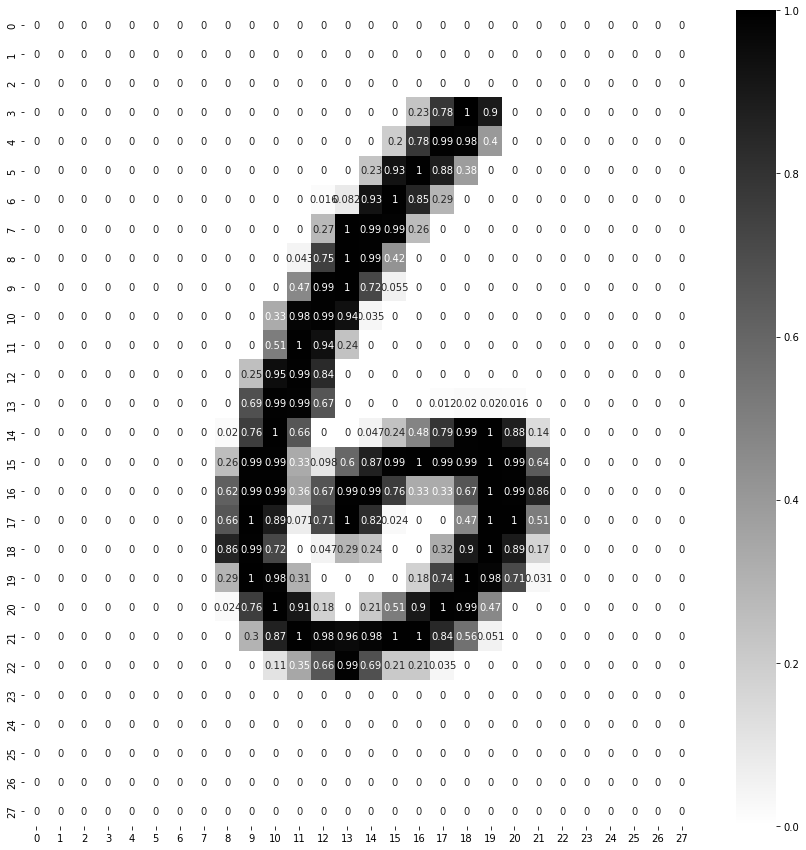

In [22]:
# Displaying a heatmap of another image from the dataset
plt.figure(figsize=(15,15))
sns.heatmap(X_train[1000],annot=True,cmap="binary")

In [24]:
# Creating the model with layers

LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
          tf.keras.layers.Dense(300,activation='relu',name="hiddenlayer1"),
          tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer2"),
          tf.keras.layers.Dense(10,activation='softmax',name="outputlayer")]

In [26]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [27]:
# Printing a summary of the model
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compiling the model
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "adam"
METRICS=["accuracy"]

In [30]:
model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [31]:
model_clf.layers

In [32]:
model_clf.layers[1].name

'hiddenlayer1'

In [33]:
# Accessing the weights and biases of one of the layers in the model
hidden1 = model_clf.layers[1]

In [36]:
weights,bias = hidden1.get_weights()

In [37]:
print(weights)


[[-0.07235423  0.0630134   0.03834616 ... -0.04215238 -0.05209904
  -0.01570389]
 [ 0.0400434   0.06593524 -0.01934144 ...  0.05783115  0.03069048
  -0.07051129]
 [ 0.05831996 -0.03467786  0.01984179 ...  0.03590777 -0.02315592
  -0.0443201 ]
 ...
 [-0.01088182  0.00917886 -0.06201654 ...  0.0026279  -0.06193904
   0.01945534]
 [ 0.02602454 -0.00404131 -0.01763054 ...  0.06288934 -0.01770935
  -0.04944859]
 [ 0.07223956  0.01919387 -0.07419796 ... -0.05286185 -0.00311718
  -0.01636436]]


In [38]:
print(bias)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [39]:
# Training the model
EPOCHS = 5
VALIDATION_SET = (X_valid,y_valid)
history = model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 7s 3ms/step - loss: 0.2130 - accuracy: 0.9365 - val_loss: 0.1092 - val_accuracy: 0.9680
Epoch 2/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0895 - accuracy: 0.9720 - val_loss: 0.0809 - val_accuracy: 0.9774
Epoch 3/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0581 - accuracy: 0.9816 - val_loss: 0.0759 - val_accuracy: 0.9804
Epoch 4/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0437 - accuracy: 0.9856 - val_loss: 0.0716 - val_accuracy: 0.9810
Epoch 5/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0356 - accuracy: 0.9882 - val_loss: 0.0676 - val_accuracy: 0.9814


In [56]:
# Saving the model
import time
def savedModel_path(model_dir="content/SAVED_MODELS/"):
  os.makedirs(model_dir,exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir,fileName)
  print(f"your model will be saved at the following location\n{model_path}")
  return model_path

In [57]:
model_clf.save(savedModel_path())

your model will be saved at the following location
content/SAVED_MODELS/Model_2023_01_22_11_26_26_.h5


In [41]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [42]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.213018,0.936509,0.109171,0.9680
1,0.089509,0.971964,0.080944,0.9774
2,0.058099,0.981600,0.075852,0.9804
3,0.043710,0.985582,0.071569,0.9810
4,0.035575,0.988182,0.067600,0.9814


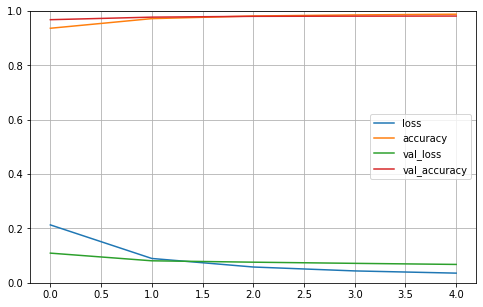

In [55]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [43]:
# Evaluating the model
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0752 - accuracy: 0.9778


[0.07523252069950104, 0.9778000116348267]

0


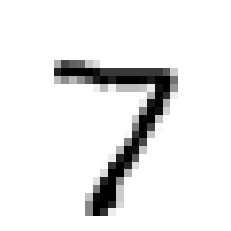

1


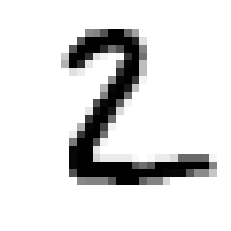

2


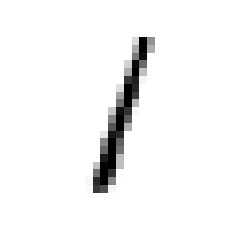

In [46]:
for i in range(0,3):
  print(i)
  plt.imshow(X_test[i],cmap='binary')
  plt.axis("off")
  plt.show()

In [47]:
prediction = model_clf.predict(X_test[:3])

1/1 [==============================] - 0s 117ms/step


In [49]:
y_prob = prediction[0]

In [50]:
y_prob.round(5)

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 9.9995e-01, 0.0000e+00, 4.0000e-05],
      dtype=float32)

In [51]:
np.argmax(y_prob.round(5))

7

In [52]:
np.argmax(prediction[1].round(5))

2

In [54]:
np.argmax(prediction[2].round(5))

1

In [ ]:
model_clf.predict(X_test)

In [ ]:
from tf.keras.models import load_model
model = load_model("content/SAVED_MODELS/Model_2023_01_22_11_26_26_.h5")